In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

#Librerias de Redes Neuronales
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

#Métricas de Validación

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
train = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("test.csv")

In [4]:
train['SalePrice'] = pd.qcut(train['SalePrice'], 3, labels=["Low", "Mid", "High"])

In [5]:
size_mapping = {
    'Low': 0,    
    'Mid': 1, 
    'High': 2    
}
train['SalePrice'] = train['SalePrice'].map(size_mapping)

In [6]:
train[['ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'GarageFinish']].head()

,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,GarageFinish
0,Gd,Gd,No,GLQ,RFn
1,TA,Gd,Gd,ALQ,RFn
2,Gd,Gd,Mn,GLQ,RFn
3,TA,TA,No,ALQ,Unf
4,Gd,Gd,Av,GLQ,RFn


In [7]:
X = train.drop(columns=["SalePrice"])

In [8]:
# X.drop(columns=["Id"],inplace=True)

In [9]:
y = train["SalePrice"]

In [10]:
X.fillna(0, inplace=True) 
X = pd.get_dummies(X)


In [11]:
X = np.array(X)
y = np.array(y)

# Modelo 1

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

In [13]:
from keras.layers import Dropout, BatchNormalization, Dense, Activation
from keras.models import Sequential
from keras.regularizers import l1_l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax')) 
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


C:\Users\esco1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
from sklearn.metrics import confusion_matrix

model.fit(X_train, y_train, epochs=400, batch_size=128, validation_split=0.2, verbose=1)

# Predicciones
preds = model.predict(X_test)
preds_classes = np.argmax(preds, axis=1)

# Matriz de Confusión
cm = confusion_matrix(y_test, preds_classes)
print(cm)


Epoch 1/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.3744 - loss: 1.6714 - val_accuracy: 0.4573 - val_loss: 0.9538
Epoch 2/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6018 - loss: 1.1302 - val_accuracy: 0.5598 - val_loss: 0.8687
Epoch 3/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6596 - loss: 0.8118 - val_accuracy: 0.6068 - val_loss: 0.8222
Epoch 4/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6828 - loss: 0.7742 - val_accuracy: 0.6453 - val_loss: 0.7906
Epoch 5/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7237 - loss: 0.7378 - val_accuracy: 0.6709 - val_loss: 0.7638
Epoch 6/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7451 - loss: 0.6773 - val_accuracy: 0.6667 - val_loss: 0.7423
Epoch 7/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7276 - loss: 0.6460 - val_accuracy: 0.6795 - val_loss: 0.7231
Epoch 8/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7640 - loss: 0.5749 - val_accuracy: 0.6667 - val_loss:

Epoch 52/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9452 - loss: 0.1247 - val_accuracy: 0.7906 - val_loss: 0.6652
Epoch 53/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9421 - loss: 0.1572 - val_accuracy: 0.7949 - val_loss: 0.6932
Epoch 54/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9445 - loss: 0.1457 - val_accuracy: 0.7863 - val_loss: 0.7252
Epoch 55/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9560 - loss: 0.1188 - val_accuracy: 0.7906 - val_loss: 0.7083
Epoch 56/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9499 - loss: 0.1379 - val_accuracy: 0.7863 - val_loss: 0.7313
Epoch 57/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9477 - loss: 0.1219 - val_accuracy: 0.7906 - val_loss: 0.6853
Epoch 58/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9566 - loss: 0.1150 - val_accuracy: 0.7949 - val_loss: 0.6906
Epoch 59/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9541 - loss: 0.1301 - val_accuracy: 0.8248 - v

Epoch 103/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9777 - loss: 0.0764 - val_accuracy: 0.8376 - val_loss: 0.8157
Epoch 104/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9732 - loss: 0.0689 - val_accuracy: 0.8162 - val_loss: 0.8154
Epoch 105/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9699 - loss: 0.0653 - val_accuracy: 0.8120 - val_loss: 0.8605
Epoch 106/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9767 - loss: 0.0705 - val_accuracy: 0.8205 - val_loss: 0.8302
Epoch 107/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9803 - loss: 0.0608 - val_accuracy: 0.8077 - val_loss: 0.8979
Epoch 108/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9715 - loss: 0.0832 - val_accuracy: 0.7778 - val_loss: 1.0911
Epoch 109/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9764 - loss: 0.0632 - val_accuracy: 0.7778 - val_loss: 1.0331
Epoch 110/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9702 - loss: 0.0633 - val_accuracy: 0.

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9691 - loss: 0.0761 - val_accuracy: 0.8077 - val_loss: 0.9016
Epoch 154/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9839 - loss: 0.0533 - val_accuracy: 0.7949 - val_loss: 0.9035
Epoch 155/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9881 - loss: 0.0401 - val_accuracy: 0.7991 - val_loss: 0.9173
Epoch 156/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9721 - loss: 0.0656 - val_accuracy: 0.7991 - val_loss: 0.9198
Epoch 157/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9805 - loss: 0.0456 - val_accuracy: 0.7991 - val_loss: 0.9425
Epoch 158/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9787 - loss: 0.0574 - val_accuracy: 0.7991 - val_loss: 0.9278
Epoch 159/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9721 - loss: 0.0753 - val_accuracy: 0.7778 - val_loss: 0.9576
Epoch 160/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9864 - loss: 0.0427 - val_accuracy: 0.7735 - val_los

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9880 - loss: 0.0338 - val_accuracy: 0.8077 - val_loss: 1.1104
Epoch 204/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9896 - loss: 0.0279 - val_accuracy: 0.7906 - val_loss: 1.1805
Epoch 205/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9816 - loss: 0.0433 - val_accuracy: 0.8034 - val_loss: 1.1323
Epoch 206/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9816 - loss: 0.0460 - val_accuracy: 0.7906 - val_loss: 1.1645
Epoch 207/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9842 - loss: 0.0597 - val_accuracy: 0.7778 - val_loss: 1.1707
Epoch 208/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9829 - loss: 0.0433 - val_accuracy: 0.7906 - val_loss: 1.0752
Epoch 209/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9772 - loss: 0.0498 - val_accuracy: 0.7863 - val_loss: 1.0350
Epoch 210/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9867 - loss: 0.0362 - val_accuracy: 0.7991 - val_los

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9857 - loss: 0.0434 - val_accuracy: 0.7991 - val_loss: 1.0789
Epoch 254/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9792 - loss: 0.0527 - val_accuracy: 0.7949 - val_loss: 1.0752
Epoch 255/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9776 - loss: 0.0564 - val_accuracy: 0.8162 - val_loss: 1.1007
Epoch 256/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9816 - loss: 0.0585 - val_accuracy: 0.7735 - val_loss: 1.2813
Epoch 257/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9795 - loss: 0.0594 - val_accuracy: 0.7821 - val_loss: 1.3155
Epoch 258/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9791 - loss: 0.0510 - val_accuracy: 0.7821 - val_loss: 1.3036
Epoch 259/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9859 - loss: 0.0445 - val_accuracy: 0.7863 - val_loss: 1.1741
Epoch 260/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9842 - loss: 0.0402 - val_accuracy: 0.7863 - val_los

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9825 - loss: 0.0322 - val_accuracy: 0.8120 - val_loss: 1.0940
Epoch 304/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9847 - loss: 0.0309 - val_accuracy: 0.8034 - val_loss: 1.1270
Epoch 305/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9893 - loss: 0.0239 - val_accuracy: 0.7991 - val_loss: 1.1462
Epoch 306/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9916 - loss: 0.0279 - val_accuracy: 0.8034 - val_loss: 1.2301
Epoch 307/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9905 - loss: 0.0319 - val_accuracy: 0.8077 - val_loss: 1.2734
Epoch 308/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9921 - loss: 0.0303 - val_accuracy: 0.7991 - val_loss: 1.2562
Epoch 309/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9861 - loss: 0.0377 - val_accuracy: 0.7778 - val_loss: 1.3252
Epoch 310/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9831 - loss: 0.0474 - val_accuracy: 0.7821 - val_los

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9937 - loss: 0.0265 - val_accuracy: 0.8120 - val_loss: 1.1773
Epoch 354/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9871 - loss: 0.0499 - val_accuracy: 0.8248 - val_loss: 1.1258
Epoch 355/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9935 - loss: 0.0245 - val_accuracy: 0.8333 - val_loss: 1.0947
Epoch 356/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9957 - loss: 0.0195 - val_accuracy: 0.8205 - val_loss: 1.1214
Epoch 357/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9870 - loss: 0.0260 - val_accuracy: 0.8376 - val_loss: 1.1118
Epoch 358/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0230 - val_accuracy: 0.8291 - val_loss: 1.0909
Epoch 359/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9846 - loss: 0.0451 - val_accuracy: 0.8162 - val_loss: 1.1074
Epoch 360/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9876 - loss: 0.0318 - val_accuracy: 0.8248 - val_los

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds_classes))


              precision    recall  f1-score   support

           0       0.83      0.84      0.84        94
           1       0.76      0.63      0.69       101
           2       0.80      0.93      0.86        97

    accuracy                           0.80       292
   macro avg       0.80      0.80      0.80       292
weighted avg       0.80      0.80      0.79       292



<Axes: >

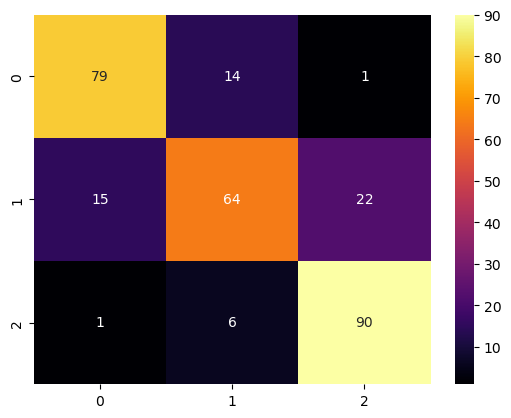

In [16]:
import seaborn as sns
sns.heatmap(cm,annot=True,cmap="inferno")

# Modelo 2

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

In [102]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],)))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(64))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))  # Cambio para clasificación multiclase
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



C:\Users\esco1\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\esco1\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [103]:


model.fit(X_train, y_train, epochs=400, batch_size=128, validation_split=0.2, verbose=1)

# Predicciones
preds = model.predict(X_test)
preds_classes = np.argmax(preds, axis=1)

# Matriz de Confusión
cm = confusion_matrix(y_test, preds_classes)
print(cm)


Epoch 1/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.3424 - loss: 1.8899 - val_accuracy: 0.3419 - val_loss: 1.0459
Epoch 2/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4837 - loss: 1.2385 - val_accuracy: 0.4316 - val_loss: 0.9902
Epoch 3/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5378 - loss: 1.2072 - val_accuracy: 0.5214 - val_loss: 0.9194
Epoch 4/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6449 - loss: 0.9586 - val_accuracy: 0.5897 - val_loss: 0.8512
Epoch 5/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6281 - loss: 0.9474 - val_accuracy: 0.6239 - val_loss: 0.8054
Epoch 6/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6421 - loss: 0.8828 - val_accuracy: 0.6368 - val_loss: 0.7743
Epoch 7/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6670 - loss: 0.7523 - val_accuracy: 0.6581 - val_loss: 0.7471
Epoch 8/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6880 - loss: 0.7818 - val_accuracy: 0.6453 - val_loss:

Epoch 52/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9098 - loss: 0.2314 - val_accuracy: 0.7692 - val_loss: 0.6955
Epoch 53/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9134 - loss: 0.2048 - val_accuracy: 0.7521 - val_loss: 0.7219
Epoch 54/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9197 - loss: 0.2087 - val_accuracy: 0.7564 - val_loss: 0.7169
Epoch 55/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9184 - loss: 0.2247 - val_accuracy: 0.7564 - val_loss: 0.7647
Epoch 56/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9221 - loss: 0.2020 - val_accuracy: 0.7821 - val_loss: 0.7070
Epoch 57/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9291 - loss: 0.2266 - val_accuracy: 0.7692 - val_loss: 0.6709
Epoch 58/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9404 - loss: 0.1703 - val_accuracy: 0.7949 - val_loss: 0.6444
Epoch 59/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9278 - loss: 0.2117 - val_accuracy: 0.7778 - v

Epoch 103/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9620 - loss: 0.1177 - val_accuracy: 0.7991 - val_loss: 0.9485
Epoch 104/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9660 - loss: 0.1004 - val_accuracy: 0.7906 - val_loss: 0.9656
Epoch 105/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9521 - loss: 0.1246 - val_accuracy: 0.7863 - val_loss: 0.9425
Epoch 106/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9655 - loss: 0.0954 - val_accuracy: 0.7821 - val_loss: 0.9178
Epoch 107/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9510 - loss: 0.1212 - val_accuracy: 0.8077 - val_loss: 0.8943
Epoch 108/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9716 - loss: 0.1082 - val_accuracy: 0.8077 - val_loss: 0.8516
Epoch 109/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9554 - loss: 0.1032 - val_accuracy: 0.8034 - val_loss: 0.8057
Epoch 110/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9748 - loss: 0.0811 - val_accuracy: 0.

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9782 - loss: 0.0622 - val_accuracy: 0.8120 - val_loss: 1.0908
Epoch 154/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9680 - loss: 0.0941 - val_accuracy: 0.8162 - val_loss: 1.0196
Epoch 155/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9777 - loss: 0.0762 - val_accuracy: 0.8248 - val_loss: 0.9830
Epoch 156/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9668 - loss: 0.0936 - val_accuracy: 0.8162 - val_loss: 0.9788
Epoch 157/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9764 - loss: 0.0667 - val_accuracy: 0.8077 - val_loss: 0.9806
Epoch 158/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9616 - loss: 0.0964 - val_accuracy: 0.8333 - val_loss: 0.9047
Epoch 159/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9574 - loss: 0.1241 - val_accuracy: 0.8248 - val_loss: 0.9171
Epoch 160/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9609 - loss: 0.1136 - val_accuracy: 0.8162 - val_los

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9819 - loss: 0.0516 - val_accuracy: 0.8205 - val_loss: 1.0509
Epoch 204/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9840 - loss: 0.0428 - val_accuracy: 0.7991 - val_loss: 1.0729
Epoch 205/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9864 - loss: 0.0403 - val_accuracy: 0.8205 - val_loss: 1.0329
Epoch 206/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9766 - loss: 0.0624 - val_accuracy: 0.8333 - val_loss: 0.9596
Epoch 207/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9858 - loss: 0.0371 - val_accuracy: 0.8462 - val_loss: 0.9094
Epoch 208/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9845 - loss: 0.0442 - val_accuracy: 0.8376 - val_loss: 0.8838
Epoch 209/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9898 - loss: 0.0348 - val_accuracy: 0.8205 - val_loss: 0.8798
Epoch 210/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9888 - loss: 0.0380 - val_accuracy: 0.8333 - val_los

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9793 - loss: 0.0678 - val_accuracy: 0.8291 - val_loss: 0.9258
Epoch 254/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9829 - loss: 0.0459 - val_accuracy: 0.8333 - val_loss: 0.9758
Epoch 255/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9859 - loss: 0.0427 - val_accuracy: 0.8205 - val_loss: 0.9921
Epoch 256/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9870 - loss: 0.0353 - val_accuracy: 0.8376 - val_loss: 0.9620
Epoch 257/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9828 - loss: 0.0500 - val_accuracy: 0.8376 - val_loss: 0.9701
Epoch 258/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9731 - loss: 0.0545 - val_accuracy: 0.8162 - val_loss: 0.9904
Epoch 259/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9818 - loss: 0.0581 - val_accuracy: 0.8248 - val_loss: 1.0464
Epoch 260/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9773 - loss: 0.0608 - val_accuracy: 0.7778 - val_los

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9857 - loss: 0.0353 - val_accuracy: 0.8120 - val_loss: 1.0562
Epoch 304/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9783 - loss: 0.0545 - val_accuracy: 0.8248 - val_loss: 1.0060
Epoch 305/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9738 - loss: 0.0797 - val_accuracy: 0.8248 - val_loss: 0.9916
Epoch 306/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9749 - loss: 0.0593 - val_accuracy: 0.7991 - val_loss: 1.0465
Epoch 307/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9843 - loss: 0.0486 - val_accuracy: 0.8034 - val_loss: 1.0535
Epoch 308/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9839 - loss: 0.0382 - val_accuracy: 0.8077 - val_loss: 1.0191
Epoch 309/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9878 - loss: 0.0403 - val_accuracy: 0.8162 - val_loss: 1.0193
Epoch 310/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9827 - loss: 0.0517 - val_accuracy: 0.8077 - val_los

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9862 - loss: 0.0416 - val_accuracy: 0.7906 - val_loss: 1.0058
Epoch 354/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9899 - loss: 0.0401 - val_accuracy: 0.7949 - val_loss: 1.0094
Epoch 355/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9854 - loss: 0.0429 - val_accuracy: 0.7991 - val_loss: 1.0080
Epoch 356/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9816 - loss: 0.0511 - val_accuracy: 0.8034 - val_loss: 0.9669
Epoch 357/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9881 - loss: 0.0382 - val_accuracy: 0.8120 - val_loss: 0.9619
Epoch 358/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9816 - loss: 0.0585 - val_accuracy: 0.7991 - val_loss: 0.9602
Epoch 359/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9802 - loss: 0.0432 - val_accuracy: 0.7991 - val_loss: 1.0056
Epoch 360/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9817 - loss: 0.0503 - val_accuracy: 0.7991 - val_los

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds_classes))


              precision    recall  f1-score   support

           0       0.84      0.88      0.86        94
           1       0.78      0.72      0.75       101
           2       0.86      0.88      0.87        97

    accuracy                           0.83       292
   macro avg       0.82      0.83      0.83       292
weighted avg       0.82      0.83      0.82       292



<Axes: >

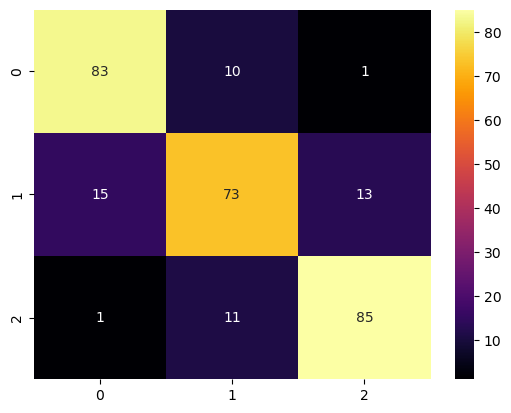

In [105]:
sns.heatmap(cm,annot=True,cmap="inferno")